# Clustering Features of Handwritten Numerals (’0’–’9’) extracted from a collection of Dutch utility maps using the whole dataset

In [70]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing necessary libraries

In [71]:
import pandas as pd   # for data manipulation
from sklearn.preprocessing import StandardScaler  # for data standardization
from sklearn.cluster import KMeans # for KMeans clustering
from sklearn.decomposition import PCA # for dimension reduction
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # used for plotting 
import numpy as np # useful for working with arrays
from sklearn.model_selection import train_test_split # for data splitting

### Loading dataset

In [72]:
fou = '/content/drive/MyDrive/review-phase-journey-in-aims/advancedDataScience/mfeat/mfeat-fou.xlsx'
fac = '/content/drive/MyDrive/review-phase-journey-in-aims/advancedDataScience/mfeat/mfeat-fac.xlsx'
kar = '/content/drive/MyDrive/review-phase-journey-in-aims/advancedDataScience/mfeat/mfeat-kar.xlsx'
pix = '/content/drive/MyDrive/review-phase-journey-in-aims/advancedDataScience/mfeat/mfeat-pix.xlsx'
zer = '/content/drive/MyDrive/review-phase-journey-in-aims/advancedDataScience/mfeat/mfeat-zer.xlsx'
mor = '/content/drive/MyDrive/review-phase-journey-in-aims/advancedDataScience/mfeat/mfeat-mor.xlsx'
info = '/content/drive/MyDrive/review-phase-journey-in-aims/advancedDataScience/mfeat/mfeat-info.xlsx'

### Reading files 

In [73]:
fou = pd.read_excel(fou)
fac = pd.read_excel(fac) 
kar = pd.read_excel(kar)
pix = pd.read_excel(pix)
zer = pd.read_excel(zer)
mor = pd.read_excel(mor)
info = pd.read_excel(info)

### Combining datasets to a whole dataset


In [74]:
whole_data = pd.concat([fou,fac,kar,pix,zer,mor], axis=1)

### **Some Basic Exploratory Data Analysis**

In [75]:
# Check the shape of the train and test sets
print('The whole dataset has got {} rows and {} columns'.format(whole_data.shape[0], whole_data.shape[1]))

The whole dataset has got 2000 rows and 649 columns


In [76]:
# Preview the first five rows of the whole dataset
whole_data.head()

,Fou_1,Fou_2,Fou_3,Fou_4,Fou_5,Fou_6,Fou_7,Fou_8,Fou_9,Fou_10,Fou_11,Fou_12,Fou_13,Fou_14,Fou_15,Fou_16,Fou_17,Fou_18,Fou_19,Fou_20,Fou_21,Fou_22,Fou_23,Fou_24,Fou_25,Fou_26,Fou_27,Fou_28,Fou_29,Fou_30,Fou_31,Fou_32,Fou_33,Fou_34,Fou_35,Fou_36,Fou_37,Fou_38,Fou_39,Fou_40,...,zer_14,zer_15,zer_16,zer_17,zer_18,zer_19,zer_20,zer_21,zer_22,zer_23,zer_24,zer_25,zer_26,zer_27,zer_28,zer_29,zer_30,zer_31,zer_32,zer_33,zer_34,zer_35,zer_36,zer_37,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47,mor_1,mor_2,mor_3,mor_4,mor_5,mor_6
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,0.075942,0.263906,0.077903,0.372009,0.219485,0.055327,0.108906,0.127752,0.114051,0.018581,0.102627,0.172682,0.073033,0.140344,0.132199,0.076015,0.032517,0.128840,0.120526,0.016615,0.102583,0.101625,0.065730,0.035213,0.079009,0.083773,0.021491,0.121625,0.067512,0.033777,...,0.100592,4.465825,37.203673,71.682698,303.833008,444.818734,0.324292,2.808212,7.505539,14.199325,109.820532,0.623083,11.902597,13.992883,6.972559,484.784871,0.344745,6.836616,41.172862,67.583218,1.875599,2.280403,170.265764,158.818410,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457,1,0,0,133.150861,1.311693,1620.221779
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,0.017184,0.314690,0.012904,0.453107,0.209364,0.053331,0.081334,0.007550,0.234876,0.043490,0.019631,0.161129,0.044329,0.132679,0.130415,0.073866,0.051192,0.030221,0.144867,0.023895,0.016790,0.121181,0.076889,0.054896,0.088678,0.097209,0.019548,0.026906,0.113283,0.020423,...,0.136957,3.005241,22.837229,40.656873,186.411684,419.543064,0.054929,3.576323,38.546889,100.034785,85.145611,0.414205,8.006745,53.191399,91.367313,371.994407,0.531269,14.376516,74.169044,82.063449,1.348741,29.158736,211.200298,34.597257,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567,1,0,0,126.724861,1.302745,1609.334822
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,0.017012,0.283372,0.060468,0.364420,0.218012,0.065799,0.100798,0.041148,0.103112,0.029623,0.016676,0.126331,0.073546,0.160574,0.127323,0.076715,0.058565,0.007764,0.074607,0.021533,0.016114,0.090223,0.077979,0.090263,0.072140,0.091450,0.035295,0.020528,0.063147,0.022222,...,0.138112,2.376392,20.892105,68.666675,168.420731,518.229961,0.113119,3.380604,21.119272,52.675563,11.774172,0.328196,7.781216,71.369955,94.039942,402.482819,0.482565,8.101806,40.012973,14.869455,1.336517,35.772897,207.147093,10.924662,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691,1,0,0,131.173861,1.319031,1568.978435
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,0.036931,0.224981,0.051425,0.337966,0.152098,0.072680,0.162303,0.037585,0.056670,0.106918,0.017703,0.109614,0.076275,0.187445,0.059987,0.087590,0.113050,0.038817,0.034270,0.088544,0.018063,0.043295,0.089820,0.156005,0.018523,0.088568,0.092721,0.036220,0.045108,0.066557,...,0.190329,5.212415,25.128272,51.937089,178.923865,386.324218,0.245137,3.963072,20.036877,27.570634,80.054547,0.692839,8.226120,61.257439,112.688600,324.849754,0.583625,7.453045,23.667204,65.148691,1.326251,31.813000,239.672998,21.054749,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814,1,0,0,129.478861,1.270878,1695.055281
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,0.093298,0.315552,0.051809,0.388674,0.216835,0.049581,0.049233,0.156873,0.206554,0.042255,0.102949,0.155439,0.059885,0.058975,0.125538,0.058147,0.067630,0.148337,0.117097,0.050259,0.078909,0.085289,0.082221,0.080176,0.076863,0.058436,0.062460,0.082330,0.045987,0.043482,...,0.076843,2.660718,24.901428,61.750370,216.615177,417.658858,0.144952,3.055750,12.775389,47.312230,66.377015,0.384703,9.695486,

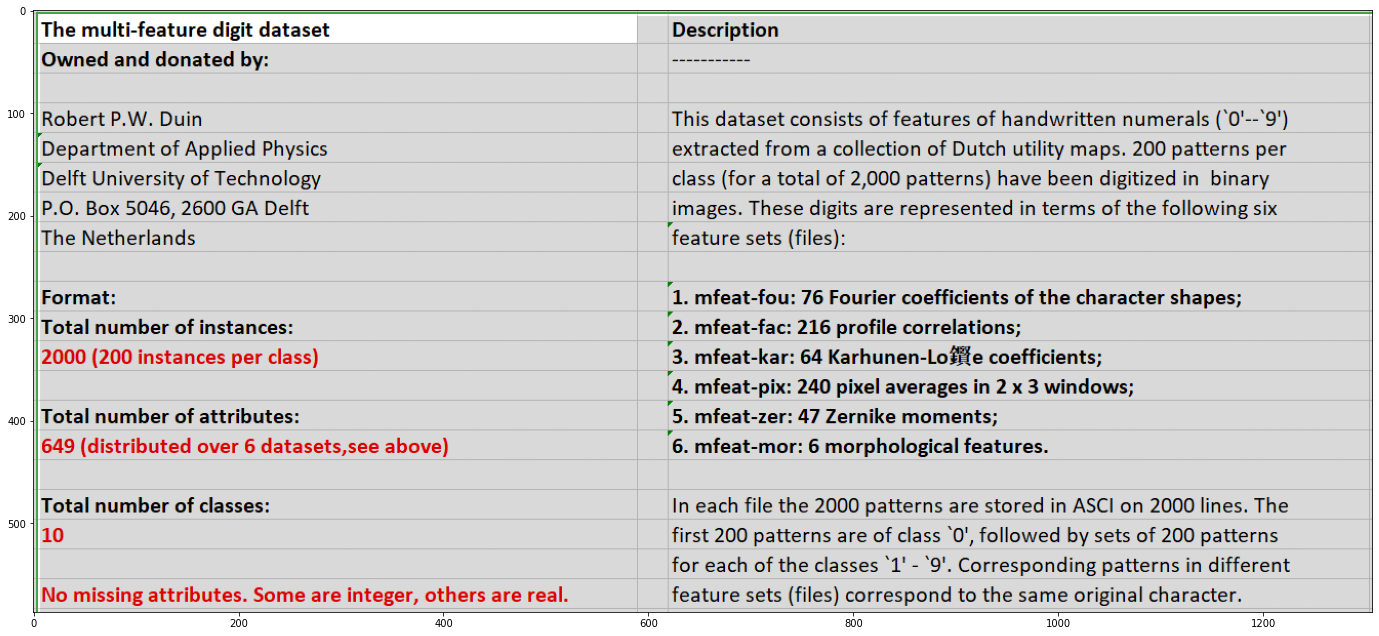

In [77]:
# Python program to read 
# image using matplotlib
  
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/content/drive/MyDrive/review-phase-journey-in-aims/advancedDataScience/mfeat/data_info.PNG')
  
# Output Images 
plt.figure(figsize=(24,20))
# Before we proceed, let us see what the variable definitions are and some information about the dataset
plt.imshow(img)

In [78]:
# Checking and confirming if there are missing values in the dataset

whole_data.isna().sum()

Fou_1    0
Fou_2    0
Fou_3    0
Fou_4    0
Fou_5    0
        ..
mor_2    0
mor_3    0
mor_4    0
mor_5    0
mor_6    0
Length: 649, dtype: int64

In [79]:
# Checking the summary statistic of the dataset
whole_data.describe()

,Fou_1,Fou_2,Fou_3,Fou_4,Fou_5,Fou_6,Fou_7,Fou_8,Fou_9,Fou_10,Fou_11,Fou_12,Fou_13,Fou_14,Fou_15,Fou_16,Fou_17,Fou_18,Fou_19,Fou_20,Fou_21,Fou_22,Fou_23,Fou_24,Fou_25,Fou_26,Fou_27,Fou_28,Fou_29,Fou_30,Fou_31,Fou_32,Fou_33,Fou_34,Fou_35,Fou_36,Fou_37,Fou_38,Fou_39,Fou_40,...,zer_14,zer_15,zer_16,zer_17,zer_18,zer_19,zer_20,zer_21,zer_22,zer_23,zer_24,zer_25,zer_26,zer_27,zer_28,zer_29,zer_30,zer_31,zer_32,zer_33,zer_34,zer_35,zer_36,zer_37,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47,mor_1,mor_2,mor_3,mor_4,mor_5,mor_6
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.185544,0.377311,0.269378,0.265686,0.300367,0.158314,0.364771,0.247213,0.288657,0.151716,0.157119,0.166569,0.164246,0.190582,0.142435,0.114983,0.127678,0.130937,0.119396,0.116822,0.107252,0.108720,0.098402,0.114511,0.105748,0.098938,0.095000,0.090615,0.092173,0.094697,0.093567,0.087220,0.082484,0.082974,0.091230,0.086686,0.081645,0.076572,0.077050,0.085383,...,0.214171,6.431719,40.214143,99.460353,154.058839,130.542999,0.341550,7.951004,52.327697,105.579465,126.832657,0.913509,14.492841,75.156531,194.535903,139.494710,1.232147,20.520319,76.855756,112.940252,2.486392,34.991966,269.727726,113.876955,3.846023,38.234141,111.894053,7.537383,185.346722,399.152215,9.206768,86.405616,54.625111,508.902572,0.492500,1.733500,0.713500,156.418886,1.639569,6155.200435
std,0.091898,0.176231,0.137980,0.110694,0.156256,0.089022,0.144367,0.123856,0.115912,0.087224,0.086344,0.082801,0.091223,0.110285,0.064219,0.058670,0.065759,0.078064,0.064941,0.052862,0.051837,0.052146,0.057550,0.063721,0.046833,0.049668,0.047023,0.049875,0.051730,0.044793,0.045019,0.042389,0.046264,0.044061,0.042475,0.042389,0.040821,0.041242,0.041335,0.040808,...,0.145773,3.602515,22.874325,55.379469,74.834184,116.070461,0.218536,5.788916,32.871699,61.424655,66.738418,0.528523,8.536848,40.025967,76.060826,111.554921,0.924266,13.045037,51.758987,64.737756,1.509830,17.747150,60.947961,91.394247,2.473214,27.619617,65.211345,3.757990,37.878378,96.330148,6.780826,52.027535,11.190058,71.008030,0.664955,1.141985,0.699759,25.010014,0.291316,3757.634467
min,0.004928,0.009000,0.005624,0.010114,0.002090,0.002676,0.011919,0.001737,0.010604,0.002342,0.003293,0.002750,0.001424,0.005902,0.006472,0.002901,0.002873,0.002088,0.002304,0.001814,0.002436,0.002608,0.002609,0.001583,0.001826,0.001106,0.004800,0.002936,0.000176,0.004410,0.002827,0.001329,0.000259,0.002569,0.003965,0.001583,0.002281,0.000469,0.001711,0.002687,...,0.005710,0.048068,0.528741,2.260400,4.692462,0.089342,0.007288,0.031303,0.911909,4.106678,5.702502,0.011211,0.438220,3.015946,6.972559,0.064944,0.031912,0.433538,0.559387,2.260642,0.031865,1.558520,50.425422,0.009749,0.073270,0.320603,1.107045,0.351190,57.557652,109.141060,0.362926,0.753130,19.956263,322.226686,0.000000,0.000000,0.000000,99.508861,1.143130,1439.534940
25%,0.112066,0.223410,0.142086,0.195214,0.180421,0.093489,0.278101,0.142938,0.206588,0.084920,0.086401,0.104314,0.089439,0.107211,0.093448,0.069081,0.081268,0.071332,0.071987,0.078478,0.069094,0.071189,0.057241,0.

In [80]:
# Checking the first five rows of the dataset
whole_data.head()

,Fou_1,Fou_2,Fou_3,Fou_4,Fou_5,Fou_6,Fou_7,Fou_8,Fou_9,Fou_10,Fou_11,Fou_12,Fou_13,Fou_14,Fou_15,Fou_16,Fou_17,Fou_18,Fou_19,Fou_20,Fou_21,Fou_22,Fou_23,Fou_24,Fou_25,Fou_26,Fou_27,Fou_28,Fou_29,Fou_30,Fou_31,Fou_32,Fou_33,Fou_34,Fou_35,Fou_36,Fou_37,Fou_38,Fou_39,Fou_40,...,zer_14,zer_15,zer_16,zer_17,zer_18,zer_19,zer_20,zer_21,zer_22,zer_23,zer_24,zer_25,zer_26,zer_27,zer_28,zer_29,zer_30,zer_31,zer_32,zer_33,zer_34,zer_35,zer_36,zer_37,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47,mor_1,mor_2,mor_3,mor_4,mor_5,mor_6
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,0.075942,0.263906,0.077903,0.372009,0.219485,0.055327,0.108906,0.127752,0.114051,0.018581,0.102627,0.172682,0.073033,0.140344,0.132199,0.076015,0.032517,0.128840,0.120526,0.016615,0.102583,0.101625,0.065730,0.035213,0.079009,0.083773,0.021491,0.121625,0.067512,0.033777,...,0.100592,4.465825,37.203673,71.682698,303.833008,444.818734,0.324292,2.808212,7.505539,14.199325,109.820532,0.623083,11.902597,13.992883,6.972559,484.784871,0.344745,6.836616,41.172862,67.583218,1.875599,2.280403,170.265764,158.818410,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457,1,0,0,133.150861,1.311693,1620.221779
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,0.017184,0.314690,0.012904,0.453107,0.209364,0.053331,0.081334,0.007550,0.234876,0.043490,0.019631,0.161129,0.044329,0.132679,0.130415,0.073866,0.051192,0.030221,0.144867,0.023895,0.016790,0.121181,0.076889,0.054896,0.088678,0.097209,0.019548,0.026906,0.113283,0.020423,...,0.136957,3.005241,22.837229,40.656873,186.411684,419.543064,0.054929,3.576323,38.546889,100.034785,85.145611,0.414205,8.006745,53.191399,91.367313,371.994407,0.531269,14.376516,74.169044,82.063449,1.348741,29.158736,211.200298,34.597257,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567,1,0,0,126.724861,1.302745,1609.334822
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,0.017012,0.283372,0.060468,0.364420,0.218012,0.065799,0.100798,0.041148,0.103112,0.029623,0.016676,0.126331,0.073546,0.160574,0.127323,0.076715,0.058565,0.007764,0.074607,0.021533,0.016114,0.090223,0.077979,0.090263,0.072140,0.091450,0.035295,0.020528,0.063147,0.022222,...,0.138112,2.376392,20.892105,68.666675,168.420731,518.229961,0.113119,3.380604,21.119272,52.675563,11.774172,0.328196,7.781216,71.369955,94.039942,402.482819,0.482565,8.101806,40.012973,14.869455,1.336517,35.772897,207.147093,10.924662,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691,1,0,0,131.173861,1.319031,1568.978435
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,0.036931,0.224981,0.051425,0.337966,0.152098,0.072680,0.162303,0.037585,0.056670,0.106918,0.017703,0.109614,0.076275,0.187445,0.059987,0.087590,0.113050,0.038817,0.034270,0.088544,0.018063,0.043295,0.089820,0.156005,0.018523,0.088568,0.092721,0.036220,0.045108,0.066557,...,0.190329,5.212415,25.128272,51.937089,178.923865,386.324218,0.245137,3.963072,20.036877,27.570634,80.054547,0.692839,8.226120,61.257439,112.688600,324.849754,0.583625,7.453045,23.667204,65.148691,1.326251,31.813000,239.672998,21.054749,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814,1,0,0,129.478861,1.270878,1695.055281
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,0.093298,0.315552,0.051809,0.388674,0.216835,0.049581,0.049233,0.156873,0.206554,0.042255,0.102949,0.155439,0.059885,0.058975,0.125538,0.058147,0.067630,0.148337,0.117097,0.050259,0.078909,0.085289,0.082221,0.080176,0.076863,0.058436,0.062460,0.082330,0.045987,0.043482,...,0.076843,2.660718,24.901428,61.750370,216.615177,417.658858,0.144952,3.055750,12.775389,47.312230,66.377015,0.384703,9.695486,

In [81]:
# Checking the last five rows of the dataset
whole_data.tail()

,Fou_1,Fou_2,Fou_3,Fou_4,Fou_5,Fou_6,Fou_7,Fou_8,Fou_9,Fou_10,Fou_11,Fou_12,Fou_13,Fou_14,Fou_15,Fou_16,Fou_17,Fou_18,Fou_19,Fou_20,Fou_21,Fou_22,Fou_23,Fou_24,Fou_25,Fou_26,Fou_27,Fou_28,Fou_29,Fou_30,Fou_31,Fou_32,Fou_33,Fou_34,Fou_35,Fou_36,Fou_37,Fou_38,Fou_39,Fou_40,...,zer_14,zer_15,zer_16,zer_17,zer_18,zer_19,zer_20,zer_21,zer_22,zer_23,zer_24,zer_25,zer_26,zer_27,zer_28,zer_29,zer_30,zer_31,zer_32,zer_33,zer_34,zer_35,zer_36,zer_37,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47,mor_1,mor_2,mor_3,mor_4,mor_5,mor_6
1995,0.171874,0.221525,0.426470,0.077220,0.264413,0.220274,0.452574,0.161113,0.356788,0.081889,0.285930,0.203827,0.040784,0.163811,0.067457,0.048564,0.164410,0.264123,0.012541,0.091519,0.028083,0.118161,0.122246,0.070693,0.157235,0.142059,0.097884,0.114246,0.136418,0.046737,0.081544,0.116200,0.036235,0.164326,0.023602,0.088187,0.108064,0.032358,0.052037,0.096972,...,0.011154,1.307009,15.537376,65.419987,208.440440,117.141680,0.025583,2.225372,32.095402,88.328256,102.332412,0.189847,6.315254,52.039457,117.619304,164.162951,0.347228,12.453563,74.225853,211.360771,1.140391,27.638568,196.184192,62.841184,2.289602,37.077931,229.878330,6.376995,144.500902,393.876660,8.672527,152.791625,43.559482,501.537544,1,1,1,157.498861,1.655794,5326.025889
1996,0.152025,0.347439,0.323534,0.087706,0.427077,0.313656,0.371549,0.262768,0.396422,0.124391,0.260356,0.218512,0.097286,0.217476,0.210608,0.211053,0.176259,0.102773,0.076026,0.047621,0.087679,0.194781,0.110956,0.129213,0.039514,0.148800,0.155706,0.074876,0.049501,0.075677,0.039718,0.039509,0.122302,0.048612,0.110184,0.072170,0.121195,0.116001,0.043049,0.069162,...,0.047798,2.344490,23.340222,45.779140,110.037593,252.360425,0.128676,3.505403,43.965758,67.856266,185.358683,0.322888,8.689829,59.125821,225.396554,260.005321,0.497942,13.993192,29.065353,213.976902,1.498226,31.929325,285.328830,3.504044,2.230959,8.122498,224.796064,7.282318,187.335473,353.453408,1.389084,161.716981,53.922259,482.428339,1,1,1,152.404861,1.620345,5243.267754
1997,0.335606,0.318426,0.257948,0.225381,0.417769,0.123067,0.333455,0.342044,0.398151,0.079550,0.236554,0.243470,0.243448,0.018145,0.161233,0.053238,0.198550,0.362144,0.157626,0.028412,0.151976,0.114419,0.182589,0.283669,0.086910,0.104370,0.138791,0.062175,0.115836,0.057975,0.108108,0.084181,0.076100,0.026233,0.113309,0.074187,0.089160,0.128813,0.076368,0.078906,...,0.087639,2.609658,24.615994,67.166259,205.344730,73.083130,0.222732,6.105982,47.085596,114.596384,139.505364,0.340579,8.166205,59.151282,111.954510,94.387692,0.858426,15.653781,61.220834,101.165851,1.317520,28.724603,172.793407,98.027607,2.592315,23.227692,122.971707,6.250161,124.337857,359.585224,4.643621,101.472040,37.013903,430.544358,1,1,1,134.672861,1.541987,3766.763222
1998,0.253910,0.171202,0.302622,0.181066,0.326383,0.167960,0.417409,0.399065,0.266153,0.097131,0.138491,0.199791,0.274987,0.169287,0.103457,0.140302,0.004924,0.243743,0.083987,0.096965,0.064141,0.218748,0.044254,0.128281,0.055098,0.145408,0.084961,0.125539,0.178404,0.130446,0.120526,0.094621,0.051111,0.057551,0.101957,0.132610,0.075904,0.017137,0.096272,0.136167,...,0.023670,0.425429,2.793636,23.411715,236.350320,148.444750,0.148524,4.960106,47.269085,184.907655,62.244963,0.064075,0.599025,24.943552,155.791308,141.137197,0.721406,18.344178,144.028937,144.284301,0.126547,14.959830,202.524752,138.955734,3.369291,69.833696,175.418772,3.563793,140.067305,486.688709,16.109266,126.684436,41.154583,571.426195,1,1,1,142.926861,1.426381,4118.327320
1999,0.271575,0.149037,0.232753,0.197720,0.236424,0.187395,0.467213,0.385117,0.191292,0.149162,0.060102,0.217536,0.250127,0.224048,0.062060,0.182079,0.097652,0.084580,0.098377,0.194415,0.111040,0.074333,0.104676,0.153361,0.118808,0.108487,0.085849,0.071666,0.075237,0.124464,0.088156,0.054610,0.084986,0.058406,0.112504,0.095188,0.126056,0.024824,0.029043,0.093526,...,0.093441,2.718638,19.894808,34.936811,25.574631,37.597007,0.345460,8.710338,56.269714,86.9

In [82]:
print('The whole dataset has got {} rows and {} columns'.format(whole_data.shape[0], whole_data.shape[1]))

The whole dataset has got 2000 rows and 649 columns


Text(0.5, 1.0, 'Visualizing two variables in the dataset')

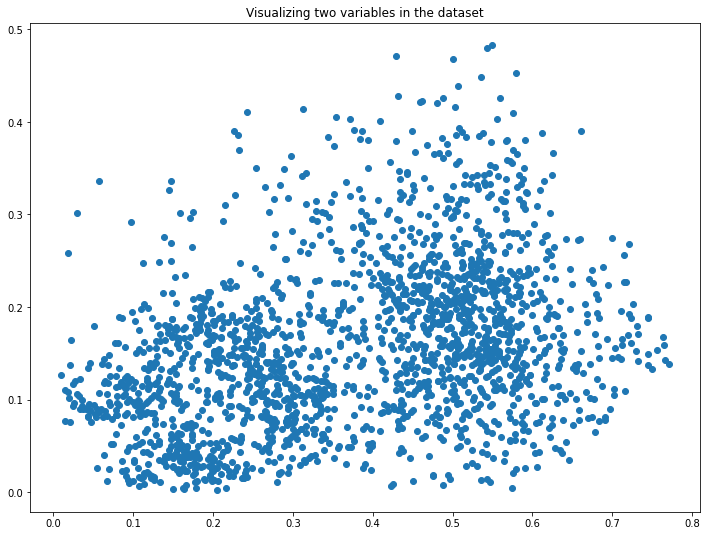

In [83]:
# Visualizing the whole_data dataset

plt.figure(figsize=(12,9))
plt.scatter(whole_data.iloc[:,1],whole_data.iloc[:,5])
plt.title('Visualizing two variables in the dataset')

### **Data Preprocessing**

In [84]:
# Data standardization

std = StandardScaler()   # initializing the function
whole_data_std = std.fit_transform(whole_data)    # standardizing the data
whole_data_std = pd.DataFrame(whole_data_std)
whole_data_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648
0,-1.302451,-1.021638,-1.200123,0.042248,2.020980,-1.375940,0.414335,-1.272051,0.682729,-1.314765,-0.940397,1.175849,-0.946734,1.645486,1.200098,-1.017065,-0.285539,-0.040813,-0.082325,-1.858904,-0.089251,1.226886,-0.440921,0.405501,0.564947,-0.461642,-1.329096,0.766593,0.548245,-1.743625,0.200312,0.339918,-0.362236,-1.084247,-0.287796,-0.068744,-1.473996,1.092695,-0.230819,-1.264910,...,-0.779345,-0.545837,-0.131642,-0.501713,2.001914,2.708306,-0.078992,-0.888608,-1.363890,-1.488051,-0.254971,-0.549643,-0.303495,-1.528481,-2.466582,3.096022,-0.960355,-1.049221,-0.689577,-0.700802,-0.404645,-1.843662,-1.632324,0.491855,-0.862452,-0.160209,-1.565075,-1.633593,-0.982565,-0.757094,0.074390,-1.276535,-0.678677,0.426902,0.763401,-1.518350,-1.019892,-0.930581,-1.125782,-1.207172
1,-1.484650,-1.142765,-1.187879,-0.348721,1.913450,-1.315701,0.459410,-1.214715,0.328624,-1.055646,-1.621072,1.789335,-1.659436,2.381025,1.042455,-1.051089,-0.704935,-1.580983,1.778685,-1.387586,-1.690741,1.005288,-0.939820,0.285178,0.526844,-0.504932,-0.931862,-1.211202,1.018900,-1.581045,-1.705861,0.801369,-0.120965,-0.637409,-0.060102,0.248323,-1.521606,-1.204554,0.876787,-1.592222,...,-0.529819,-0.951373,-0.759859,-1.062094,0.432435,2.490490,-1.311884,-0.755888,-0.419335,-0.090291,-0.624790,-0.944953,-0.759966,-0.548909,-1.356735,2.084694,-0.758498,-0.471086,-0.051921,-0.477071,-0.753685,-0.328768,-0.960525,-0.867664,-0.507894,-0.102620,-0.632136,-0.229694,-0.797772,-0.221373,-0.157267,-0.804946,-0.740678,0.135145,0.763401,-1.518350,-1.019892,-1.187582,-1.156505,-1.210070
2,-1.647592,-0.849450,-1.164307,-1.246896,1.998040,-1.143372,0.733514,-1.658063,0.307292,-1.228712,-1.623064,1.411004,-1.137903,1.576661,1.177162,-0.838523,-0.408880,-1.150489,-0.250812,-1.649960,-1.747755,0.337790,-0.432000,0.723054,0.460807,-0.447557,-0.775030,-1.661587,-0.339648,-1.633801,-1.720867,0.070861,-0.097408,0.165475,-0.449571,0.112422,-1.135757,-1.359239,-0.336441,-1.548119,...,-0.521898,-1.125975,-0.844915,-0.556188,0.191964,3.340935,-1.045544,-0.789706,-0.949638,-0.861497,-1.724453,-1.107729,-0.786391,-0.094627,-1.321588,2.358066,-0.811205,-0.952210,-0.711992,-1.515272,-0.761783,0.044014,-1.027045,-1.126745,-0.958401,-0.679285,-1.254704,0.085393,-0.930059,0.211965,-0.689741,-1.155705,-0.898369,0.577686,0.763401,-1.518350,-1.019892,-1.009649,-1.100586,-1.220813
3,-1.341040,-0.904332,-1.371076,0.216014,1.574411,-1.264443,0.421074,-1.812006,0.369314,-0.374569,-1.392322,0.705622,-1.237058,1.336729,0.150505,-0.721212,0.526667,-1.196141,-0.966141,-0.187404,-1.727947,0.017135,-0.384583,1.144861,-0.977355,-0.228543,0.383946,-1.038818,-1.119608,-0.137403,-1.677581,-1.036482,0.158617,1.657916,-1.712219,0.044420,0.271381,-0.978662,-0.772940,-0.461435,...,-0.163597,-0.338544,-0.659676,-0.858353,0.332351,2.204223,-0.441290,-0.689063,-0.982575,-1.270310,-0.701093,-0.417628,-0.734263,-0.347339,-1.076346,1.661974,-0.701837,-1.001955,-1.027877,-0.738418,-0.768584,-0.179170,-0.493244,-1.015878,-1.009632,-0.871143,-1.247487,-0.117022,-0.303837,0.438167,-0.811423,-1.402941,-0.257899,0.929497,0.763401,-1.518350,-1.019892,-1.077439,-1.265922,-1.187252
4,-1.345032,-1.015697,-1.146379,-0.110477,1.972187,-1.513301,0.349722,-1.254565,0.178226,-1.176274,-0.739335,1.799748,-1.232848,1.796634,1.158818,-1.115021,-1.193211,0.332320,1.342443,-1.410941,-0.083043,0.896142,-0.669437,-0.871774,0.422676,-0.821484,-0.582205,1.157603,0.481933,-0.992336,-0.325666,-0.045567,-0.005690,-0.063518,-0.338344,-0.666621,-0.470106,0.139657,-0.751670,-1.027016,...,-0.942303,-1.047031,-0.669595,-0.681108,0.836142,2.474253,-0.899844,-0.845837,-1.203534,-0.948834,-0.906086,-1.000786,-0.562099,0.020162,-1.426658,2.335582,-0.843830,-1.262432,-1.022475,-0.9

### PCA as a preprecessor before supervised learning is applied

In [85]:
# Performing principal components on standardized whole_data dataset

whole_data_pca = PCA(n_components=649)
whole_data_pc = whole_data_pca.fit_transform(whole_data_std)

In [86]:
# # Trying cross validation for PCA
# def cv_pca(data, rank, p_holdout=.1):
#     """Fit PCA while holding out a fraction of the dataset.
#     """
#     # create masking matrix
#     M = np.random.rand(data.shape) < p_holdout

#     # fit pca
#     U = np.random.randn(data.shape[0], rank)
#     for itr in range(20):
#         Vt = censored_lstsq(U, data, M)
#         U = censored_lstsq(Vt.T, data.T, M.T).T

#     # We could orthogonalize U and Vt and then rotate to align
#     # with directions of maximal variance, but we won't bother.

#     # return result and test/train error
#     resid = np.dot(U, Vt) - data
#     train_err = np.mean(resid[M]**2)
#     test_err = np.mean(resid[~M]**2)
#     return train_err, test_err


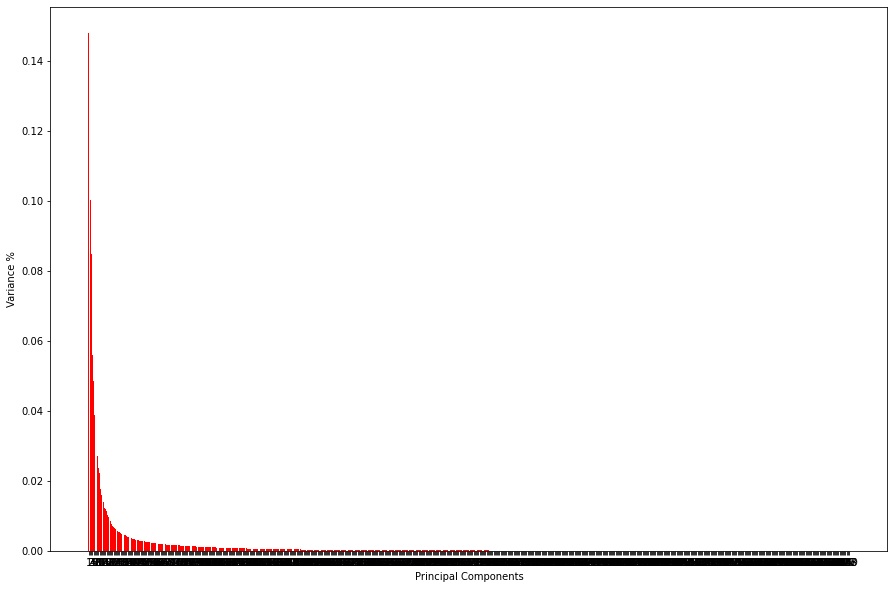

In [87]:
# visualizing the variances for each of the principal components uisng whole_data dataset

PC = range(1, whole_data_pca.n_components_+1)
plt.bar(PC, whole_data_pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.gcf().set_size_inches(15, 10)
plt.xticks(PC)

# keeping principal components of whole_data dataset as a dataframe 
whole_data_PCA_components = pd.DataFrame(whole_data_pc)

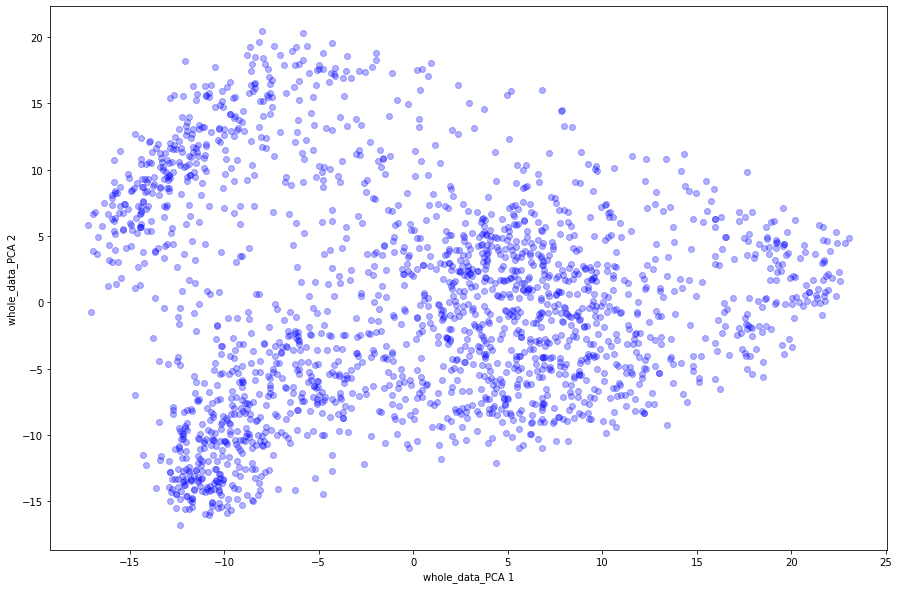

In [88]:
# Visualizing the first two principal components

plt.scatter(whole_data_PCA_components[0], whole_data_PCA_components[1], alpha=.3, color='blue')
plt.xlabel('whole_data_PCA 1')
plt.ylabel('whole_data_PCA 2')
plt.gcf().set_size_inches(15, 10)
plt.show()

In [89]:
# Checking the total number of principal components that gives ~75% explained variability

whole_data_pca.explained_variance_ratio_
summ=0
counter=0
for i in whole_data_pca.explained_variance_ratio_:
  summ += i
  counter += 1
  if summ >= 0.75:
    break
print('Explained variability is {} and the number of PCs is {}'.format(summ,counter))


Explained variability is 0.7504822108414009 and the number of PCs is 28


In [90]:
# Checking the amount of variability the first two PCs give

whole_data_pca.explained_variance_ratio_[0] + whole_data_pca.explained_variance_ratio_[1]

0.24827755356198772

In [91]:
# Getting the principal components obtained
PCA_components = pd.DataFrame(whole_data_pc, columns=['PF'+ str(i) for i in range(1,650)])

# Retaining only 28 principal components
pCa=pd.DataFrame(PCA_components[['PF'+ str(i) for i in range(1,29)]])

# Checking the Data Frame if the new datasets (retained principal components)
pCa

,PF1,PF2,PF3,PF4,PF5,PF6,PF7,PF8,PF9,PF10,PF11,PF12,PF13,PF14,PF15,PF16,PF17,PF18,PF19,PF20,PF21,PF22,PF23,PF24,PF25,PF26,PF27,PF28
0,-10.792587,-14.217229,-2.735840,-2.498813,-1.183472,7.075655,-2.578780,2.312855,-1.391230,1.417175,-1.194474,5.369621,-4.902125,3.601024,0.150047,2.602601,-1.165360,6.190720,3.160199,1.704685,-0.713454,1.388643,2.456389,-2.835042,1.307848,-1.734991,0.933379,-0.376995
1,-8.030707,-13.084227,1.290484,-5.413479,-5.434129,7.035879,0.875896,2.192293,-3.160373,1.651192,-0.190991,-1.255135,-4.972394,-1.426335,2.825607,3.014327,1.960846,-0.289521,-0.622466,2.135758,-1.915302,0.391385,-0.103052,-1.748458,-2.825040,-1.671180,-0.984663,0.191202
2,-11.856732,-12.375021,0.499917,-0.850888,-4.471142,3.153493,-6.135362,6.616403,-4.272699,-1.366273,-2.505878,0.632223,-1.690432,-2.575391,0.067668,2.598641,-1.479528,-0.579584,-3.103386,-0.505584,-1.746208,1.234463,-0.539465,-1.054980,0.677298,-1.226720,-0.985663,-0.749698
3,-8.377406,-13.201985,-1.619564,-2.736352,-2.866328,2.761106,-1.290269,6.484547,-3.559916,0.849158,-5.206243,0.087176,-0.585188,-0.479588,1.851203,0.838908,-0.045600,1.870220,-3.787192,-1.214070,0.145264,-0.380849,-2.005035,0.855298,0.391183,0.258558,2.135668,-0.402926
4,-11.087021,-10.574100,-0.976119,-6.274910,-2.339075,7.777125,1.281137,2.372110,-2.397869,-3.129942,1.180334,-2.634606,-5.461421,-1.969783,-0.894054,4.255233,-1.564033,-1.614645,-0.916608,0.011551,-1.523042,0.324175,0.882288,-1.668045,-3.968337,-1.629410,2.033527,0.245889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.769509,-8.680915,10.235653,2.825178,0.665071,-1.597781,-4.233299,-4.576576,2.839033,-9.605088,0.360657,0.631460,2.078530,1.402225,-1.372753,1.314634,-2.458325,-0.487894,0.572170,1.843109,0.660931,1.652842,-1.247275,-0.139134,-0.939738,-0.068162,2.129106,0.518953
1996,9.287121,-8.811792,5.358049,0.754445,1.015373,2.737964,2.330241,0.712243,-4.391118,-4.845244,3.326226,-4.549626,0.284094,3.859734,3.579999,0.234719,-1.898637,-0.828729,1.974728,0.247807,-0.066334,-0.333361,-2.066759,-4.388214,-0.422499,0.498739,0.204085,0.717177
1997,3.091909,-7.749015,7.409622,7.716558,-4.053819,2.220747,2.002149,-8.093720,-0.343461,-5.732554,-2.644763,1.016286,0.146934,-0.496116,0.465860,2.950817,-0.247537,4.162928,-4.194662,1.150076,3.046811,0.987033,3.290591,0.754483,0.619356,-2.385406,0.537091,-0.842359
1998,0.014782,-8.775466,12.099608,1.365450,-4.051368,-1.909515,0.013557,-6.131532,-1.581514,-3.620879,2.472089,2.908302,0.193909,-1.015459,0.258874,2.191498,-1.508815,0.563726,-1.927651,2.602731,0.472071,1.344925,-1.792252,2.112881,-0.331673,1.645931,0.609325,-1.536529


In [92]:
# Getting the true labels for the dataset
range(len(whole_data))

# digits = [0,1,2,3,4,5,6,7,8,9]
# print(digits)

targets = []
for i in range(len(whole_data)):
  if i<200:
    targets.append(0)
  elif 200 <= i < 400:
    targets.append(1)
  elif 400 <= i < 600:
    targets.append(2)
  elif 600 <= i < 800:
    targets.append(3)
  elif 800 <= i < 1000:
    targets.append(4)
  elif 1000 <= i < 1200:
    targets.append(5)
  elif 1200 <= i < 1400:
    targets.append(6)
  elif 1400 <= i < 1600:
    targets.append(7)
  elif 1600 <= i < 1800:
    targets.append(8)
  else:
    targets.append(9)
  

# Turning the true labels into Data Frame 
Targets = pd.DataFrame(targets)
Targets = Targets[0]

In [93]:
# Checking the first 5 rows of the true labels
Targets.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [94]:
# Checking the last 5 rows of the true labels
Targets.tail()

1995    9
1996    9
1997    9
1998    9
1999    9
Name: 0, dtype: int64

# Checking PCA Performance on all the dataset

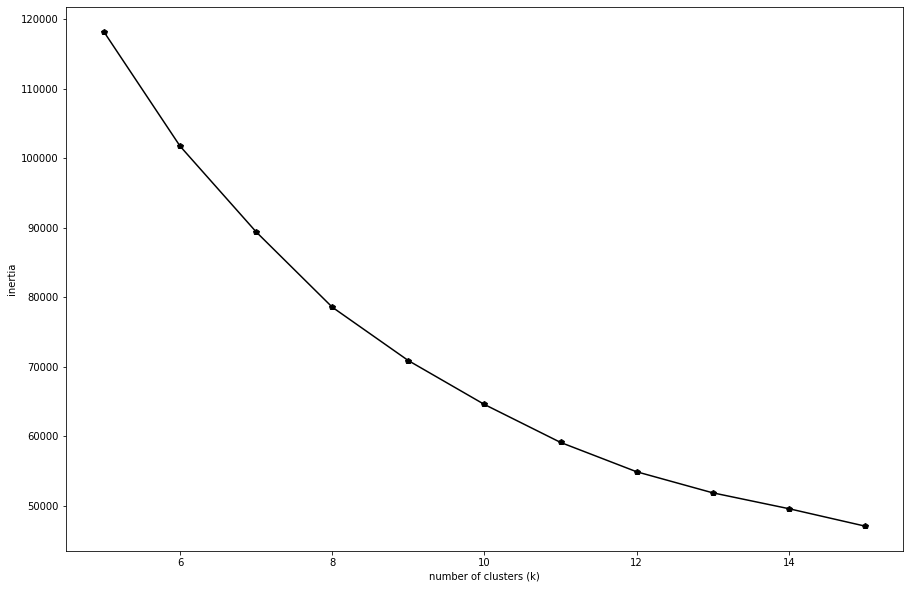

In [95]:
# applying KMeans algorithm with different number of clusters (k)

inertias = []

for k in range(5,16):  # trying k = 5 up to 15
    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    
    # Fit model to whole_data dataset
    model.fit(whole_data_PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


#  visualizing the inertias
plt.plot(range(5,16), inertias, '-p', color='black')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.gcf().set_size_inches(15, 10)
plt.show()

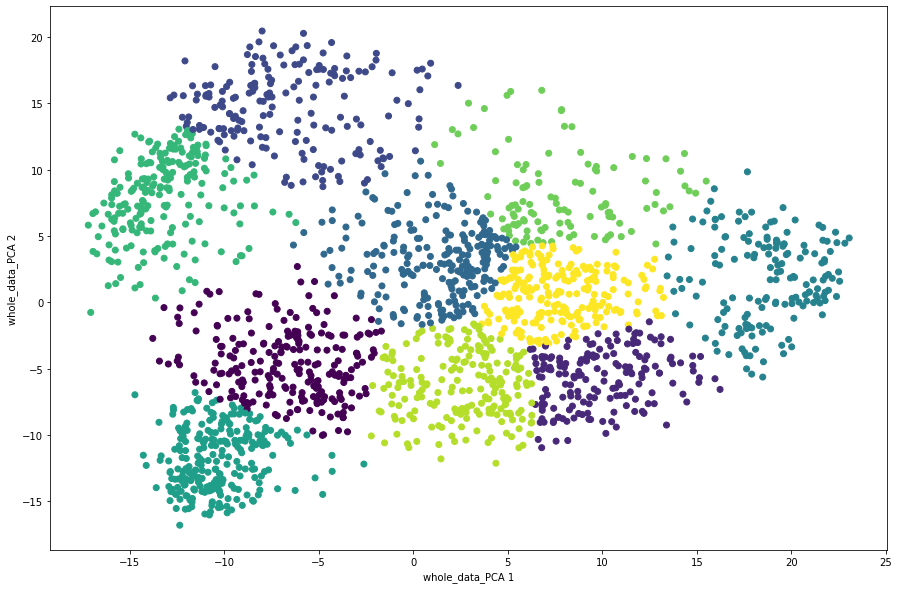

In [96]:
# performing KMeans on PCA for whole_data dataset with k = 10 using the first two princpal components and visualizing it

model = KMeans(n_clusters=10, init='k-means++', random_state=42)
model.fit(whole_data_PCA_components.iloc[:,:2])

labels = model.predict(whole_data_PCA_components.iloc[:,:2])
plt.scatter(whole_data_PCA_components[0], whole_data_PCA_components[1], c=labels)
plt.xlabel('whole_data_PCA 1')
plt.ylabel('whole_data_PCA 2')
plt.gcf().set_size_inches(15, 10)
plt.show()
# plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9'])

In [97]:
# Checking through the KMeans and the cluster each individual belongs to

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
pCa=pd.DataFrame(PCA_components[['PF'+ str(i) for i in range(1,29)]])

clusters = kmeans.fit_predict(pCa)

pCa['Cluster'] = clusters

print(pCa.head())

         PF1        PF2       PF3  ...      PF27      PF28  Cluster
0 -10.792587 -14.217229 -2.735840  ...  0.933379 -0.376995        9
1  -8.030707 -13.084227  1.290484  ... -0.984663  0.191202        9
2 -11.856732 -12.375021  0.499917  ... -0.985663 -0.749698        9
3  -8.377406 -13.201985 -1.619564  ...  2.135668 -0.402926        9
4 -11.087021 -10.574100 -0.976119  ...  2.033527  0.245889        9

[5 rows x 29 columns]


In [98]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(Targets, pCa['Cluster'])

0.8084268540924309

Text(87.0, 0.5, 'Predicted Label')

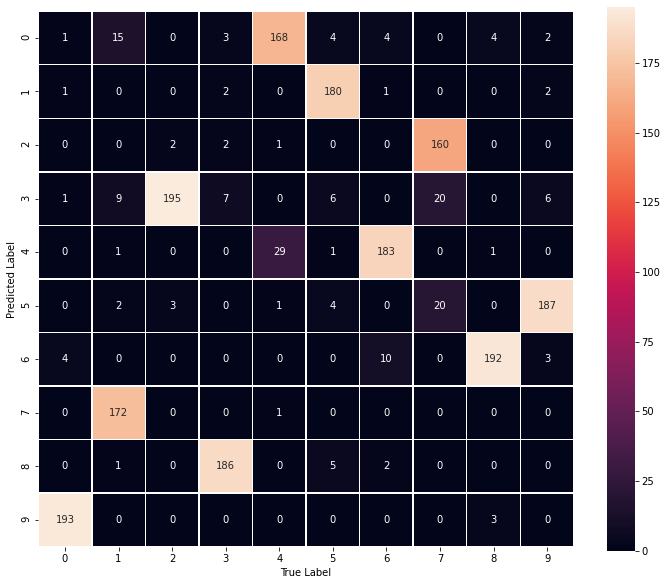

In [99]:
# confusion matrix to explain how correctly or wrongly the digits are predicted

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Targets, pCa['Cluster'])
plt.figure(figsize=(12,10))
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',  #cbar = False, 
            linewidths=.5
            #xticklabels = Targets_names,
            #yticklabels = Targets_names
            )

plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [100]:
# #Using Correlation to check if variables (principal components) are related
# plt.figure(figsize=(24,20))
# cor = pCa.drop("Cluster", axis=1).corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

### Using Machine Learning Algorithm and Deep Learning Algorithm on the retained PCs

### Data Splitting before applying Supervised Learning



In [101]:
pCa = pCa.drop('Cluster', axis=1)
pCa

,PF1,PF2,PF3,PF4,PF5,PF6,PF7,PF8,PF9,PF10,PF11,PF12,PF13,PF14,PF15,PF16,PF17,PF18,PF19,PF20,PF21,PF22,PF23,PF24,PF25,PF26,PF27,PF28
0,-10.792587,-14.217229,-2.735840,-2.498813,-1.183472,7.075655,-2.578780,2.312855,-1.391230,1.417175,-1.194474,5.369621,-4.902125,3.601024,0.150047,2.602601,-1.165360,6.190720,3.160199,1.704685,-0.713454,1.388643,2.456389,-2.835042,1.307848,-1.734991,0.933379,-0.376995
1,-8.030707,-13.084227,1.290484,-5.413479,-5.434129,7.035879,0.875896,2.192293,-3.160373,1.651192,-0.190991,-1.255135,-4.972394,-1.426335,2.825607,3.014327,1.960846,-0.289521,-0.622466,2.135758,-1.915302,0.391385,-0.103052,-1.748458,-2.825040,-1.671180,-0.984663,0.191202
2,-11.856732,-12.375021,0.499917,-0.850888,-4.471142,3.153493,-6.135362,6.616403,-4.272699,-1.366273,-2.505878,0.632223,-1.690432,-2.575391,0.067668,2.598641,-1.479528,-0.579584,-3.103386,-0.505584,-1.746208,1.234463,-0.539465,-1.054980,0.677298,-1.226720,-0.985663,-0.749698
3,-8.377406,-13.201985,-1.619564,-2.736352,-2.866328,2.761106,-1.290269,6.484547,-3.559916,0.849158,-5.206243,0.087176,-0.585188,-0.479588,1.851203,0.838908,-0.045600,1.870220,-3.787192,-1.214070,0.145264,-0.380849,-2.005035,0.855298,0.391183,0.258558,2.135668,-0.402926
4,-11.087021,-10.574100,-0.976119,-6.274910,-2.339075,7.777125,1.281137,2.372110,-2.397869,-3.129942,1.180334,-2.634606,-5.461421,-1.969783,-0.894054,4.255233,-1.564033,-1.614645,-0.916608,0.011551,-1.523042,0.324175,0.882288,-1.668045,-3.968337,-1.629410,2.033527,0.245889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.769509,-8.680915,10.235653,2.825178,0.665071,-1.597781,-4.233299,-4.576576,2.839033,-9.605088,0.360657,0.631460,2.078530,1.402225,-1.372753,1.314634,-2.458325,-0.487894,0.572170,1.843109,0.660931,1.652842,-1.247275,-0.139134,-0.939738,-0.068162,2.129106,0.518953
1996,9.287121,-8.811792,5.358049,0.754445,1.015373,2.737964,2.330241,0.712243,-4.391118,-4.845244,3.326226,-4.549626,0.284094,3.859734,3.579999,0.234719,-1.898637,-0.828729,1.974728,0.247807,-0.066334,-0.333361,-2.066759,-4.388214,-0.422499,0.498739,0.204085,0.717177
1997,3.091909,-7.749015,7.409622,7.716558,-4.053819,2.220747,2.002149,-8.093720,-0.343461,-5.732554,-2.644763,1.016286,0.146934,-0.496116,0.465860,2.950817,-0.247537,4.162928,-4.194662,1.150076,3.046811,0.987033,3.290591,0.754483,0.619356,-2.385406,0.537091,-0.842359
1998,0.014782,-8.775466,12.099608,1.365450,-4.051368,-1.909515,0.013557,-6.131532,-1.581514,-3.620879,2.472089,2.908302,0.193909,-1.015459,0.258874,2.191498,-1.508815,0.563726,-1.927651,2.602731,0.472071,1.344925,-1.792252,2.112881,-0.331673,1.645931,0.609325,-1.536529


### **Random Forests (when 28 PCs are retained)**

In [102]:
# Getting the PCs and true labels
X = pCa; y = Targets

# Splitting dataset into ratio 70:30; [70%(for training), 30%(for testing)]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Create the model with 100 trees
rfc = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Fit on training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### **Random Forest Model Performance (when 28 PCs are retained)**

In [103]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# multi-class classification
# Actual class predictions
rf_predictions = rfc.predict(X_test)
print ("Random Forest Train Accuracy Baseline:", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print ("Random Forest Test Accuracy Baseline:", metrics.accuracy_score(y_test, rfc.predict(X_test)))

# Another way of evaluating the model is Confusion Matrix
print('\n', confusion_matrix(y_test,rf_predictions))

Random Forest Train Accuracy Baseline: 1.0
Random Forest Test Accuracy Baseline: 0.9716666666666667

 [[50  0  0  0  0  1  0  0  1  0]
 [ 0 69  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  1  0  0]
 [ 0  0  0 54  0  0  0  1  0  0]
 [ 0  0  0  0 53  0  1  0  0  0]
 [ 0  0  0  2  1 46  0  0  0  0]
 [ 0  0  0  0  3  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 62  0  0]
 [ 0  1  0  0  0  0  0  0 62  1]
 [ 0  1  1  0  0  1  0  0  1 62]]


### **Feature Importance - Random Forest**

In [104]:
from sklearn import inspection
import mlxtend

from mlxtend.evaluate import feature_importance_permutation

import pandas as pd

# Extract feature importance
importance_feats = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rfc.feature_importances_}).\
                   sort_values('importance', ascending = False) # in the descending order

# Display
importance_feats

,feature,importance
0,PF1,0.140117
1,PF2,0.126167
4,PF5,0.100636
2,PF3,0.091749
7,PF8,0.079287
3,PF4,0.061295
5,PF6,0.054700
9,PF10,0.040417
6,PF7,0.034837
10,PF11,0.027431


### **Random Forests (on whole dataset)**

In [109]:
# Getting the PCs and true labels
X = whole_data_std; y = Targets

# Splitting dataset into ratio 70:30; [70%(for training), 30%(for testing)]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Create the model with 100 trees
rfc = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Fit on training data
rfc.fit(X_train, y_train)

# ---------------


from sklearn import metrics
from sklearn.metrics import accuracy_score

# multi-class classification
# Actual class predictions
rf_predictions = rfc.predict(X_test)
print ("Random Forest Train Accuracy Baseline:", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print ("Random Forest Test Accuracy Baseline:", metrics.accuracy_score(y_test, rfc.predict(X_test)))

# Another way of evaluating the model is Confusion Matrix
print('\n', confusion_matrix(y_test,rf_predictions))

# -----------

from sklearn import inspection
import mlxtend

from mlxtend.evaluate import feature_importance_permutation

import pandas as pd

# Extract feature importance
importance_feats = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rfc.feature_importances_}).\
                   sort_values('importance', ascending = False) # in the descending order

# Display
importance_feats


Random Forest Train Accuracy Baseline: 1.0
Random Forest Test Accuracy Baseline: 0.98

 [[51  0  0  0  0  1  0  0  0  0]
 [ 0 69  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  1  0  0]
 [ 0  1  0 54  0  0  0  0  0  0]
 [ 0  1  0  0 53  0  0  0  0  0]
 [ 0  0  0  2  1 46  0  0  0  0]
 [ 0  2  0  0  1  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 62  0  0]
 [ 0  1  0  0  0  0  0  0 63  0]
 [ 0  1  0  0  0  0  0  0  0 65]]


,feature,importance
643,643,0.033187
648,648,0.029967
644,644,0.023675
647,647,0.016390
646,646,0.015101
...,...,...
564,564,0.000015
466,466,0.000013
367,367,0.000012
563,563,0.000000


### **The most important feature:** PF1 and PF2 is the most important feature.

### **Random Forests (on all the PCs)**

### **Random Forests (on whole dataset)**

### **Deep Learning Algorithm**

In [229]:
# Trying out neural network

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline